The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [17]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!

In [18]:
nobel = pd.read_csv('./data/nobel.csv')

In [19]:
top_gender = nobel['sex'].value_counts().index[0]
top_gender

'Male'

In [20]:
top_country = nobel['birth_country'].value_counts().index[0]
top_country

'United States of America'

In [21]:
nobel['decade'] = nobel['year'] // 10 * 10
nobel_usa = nobel[nobel['birth_country'] == 'United States of America']
nobel_usa
nobel_winner_usa = nobel_usa.groupby('decade', as_index = False).size()
nobel_winner = nobel.groupby('decade', as_index = False).size()
nobel_winner["usa_winners"] = nobel_winner_usa['size'] / nobel_winner['size']
max_decade_usa = nobel_winner[nobel_winner["usa_winners"] == nobel_winner["usa_winners"].max()].iloc[0,0]
max_decade_usa

np.int64(2000)

In [22]:
print(f"The {max_decade_usa}s marked the period when the USA achieved its highest ratio, reaching a value of {nobel_winner['usa_winners'].max()}.")

The 2000s marked the period when the USA achieved its highest ratio, reaching a value of 0.42276422764227645.


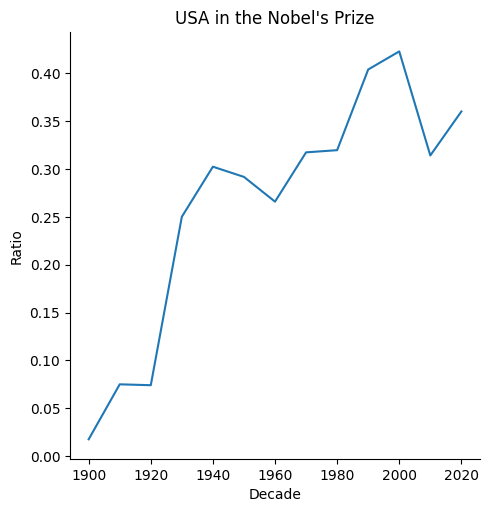

In [23]:
sns.relplot(data=nobel_winner, x='decade', y="usa_winners", kind='line')
plt.xlabel("Decade")
plt.ylabel("Ratio")
plt.title("USA in the Nobel's Prize")
plt.show()

In [24]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]
max_female_decade_category
max_female_dict = {max_female_decade_category.iloc[0,0]: max_female_decade_category.iloc[0,1]}

In [25]:
print(f'The Nobel Prize with the highest number of female winners is the {max_female_dict[list(max_female_dict.keys())[0]]} Prize, awarded in the decade of the {list(max_female_dict.keys())[0]}s')

The Nobel Prize with the highest number of female winners is the Literature Prize, awarded in the decade of the 2020s


In [26]:
winner_female = nobel[nobel.sex == "Female"]
only_female_winner= winner_female.groupby(['decade', 'category'], as_index=False).size()
winner_female

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020,True
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,2020,True
993,2023,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,2020,True
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020,True


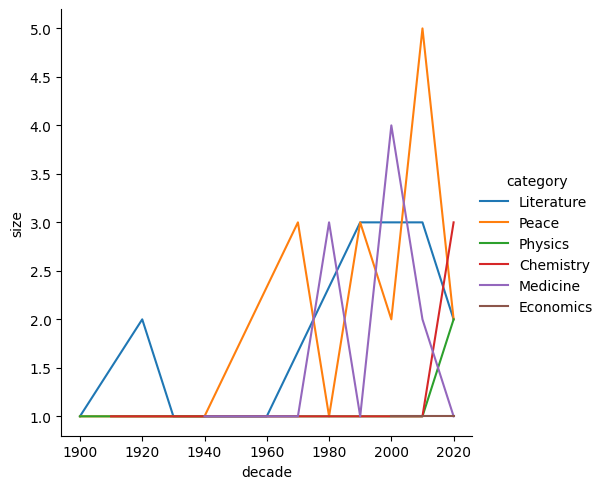

In [27]:
sns.relplot(data=only_female_winner, x="decade", y = 'size', hue='category', kind='line')
plt.show()

In [28]:
first_female_nobel = winner_female[['category','full_name']][winner_female['year']==winner_female['year'].min()]
first_woman_name = first_female_nobel.iloc[0,1]
first_woman_category = first_female_nobel.iloc[0,0]

In [29]:
print(f"The first woman who won a Nobel Prize was {first_woman_name}, in the category {first_woman_category}.")

The first woman who won a Nobel Prize was Marie Curie, née Sklodowska, in the category Physics.


In [30]:
nobel_win = nobel.groupby('full_name', as_index=False).size()
nobel_win = nobel_win[nobel_win['size']>1]
repeat_list = []
for i in range(len(nobel_win)):
    repeat_list.append(nobel_win.iloc[i,0])
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Frederick Sanger',
 'John Bardeen',
 'Linus Carl Pauling',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']